#  Homework 1 (HW1)
Deadline: February 28 at 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

**b)** Represent the distribution of income per capita (across countries) for a given year (for example: 2007) with a histogram! (Hint: use the *.hist()* function on the desired data column)

## Exercise 1 (HW1/1)

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. We will use data from the gapminder website (http://www.gapminder.org/data/). (50%)

**a)** Download the *countries.csv* file from Moodle and save it into a *Data* folder in the same directory as this notebook. Use the relative path to load it as a pandas DataFrame named *countries* using the read_csv() function. From Gapminder import the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* data. Name them *income* and *life_exp* respectively. You can read in the data without dowloading it to your computer using this code:

<code>pd.read_excel('https://docs.google.com/spreadsheets/d/1gZZ28UiWCVue-tFHMEVOvSO58x7x-w20E23l1wZTR3E/export?format=xlsx', sheet_name='data-GDP-per-capita-in-columns')</code><br>
<br><code>pd.read_excel('https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx', sheet_name='countries_and_territories')</code><br>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

countries = pd.read_csv(
    '/Users/nixilis/Desktop/DS_BP/DSHW1/countries.csv')
    
incomes = pd.read_excel('https://docs.google.com/spreadsheets/d/1gZZ28UiWCVue-tFHMEVOvSO58x7x-w20E23l1wZTR3E/export?format=xlsx', sheet_name='data-GDP-per-capita-in-columns')


life_exp = pd.read_excel('https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx', sheet_name='countries_and_territories')

In [3]:
incomes.columns = incomes.iloc[2]
incomes = incomes.iloc[3:]

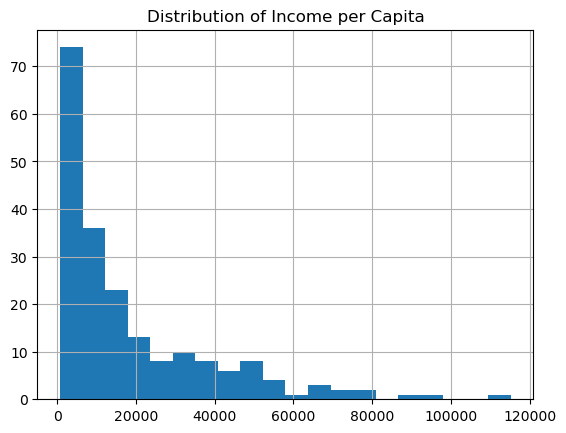

In [4]:
incomes.hist(column = 2007, bins = 20)
plt.title("Distribution of Income per Capita") 
plt.show()

**c)** Write a function that merges the  *countries*, *income* and *life_exp* DataFrames for a given year. The year should be the function's input. (Hint: Use the *pd.merge()* function!)

In [1]:
def yearToData(year): 
    incomesYear = incomes[['Country Name', year]]
    life_expYear = life_exp[['geo.name', year]]
    
    incomesnew = incomesYear.rename(columns={"Country Name": "Country"})
    life_expnew = life_expYear.rename(columns={"geo.name": "Country"})
    
    countriesdf = pd.DataFrame(countries)
    incomesYeardf = pd.DataFrame(incomesnew)
    life_expYeardf = pd.DataFrame(life_expnew) 

    merged = countriesdf.merge(incomesYeardf, on = 'Country')
    merged = merged.merge(life_expYeardf, on = 'Country')
        
    strYear = str(year)
    
    merged = merged.rename(columns={str(year+0.0)+"_x": "Income" + strYear})
    merged = merged.rename(columns={strYear+"_y": "Life_Exp" + strYear})
    
    return merged

yearToData(2007)

NameError: name 'incomes' is not defined

**d)** Using the dataframe created in part c), present a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). <span style="color:red">What changed in 60 years?</span>
(Hints: 1. Use the *pd.boxplot* function! 2. Use a logarithmic scale for the income axis!)

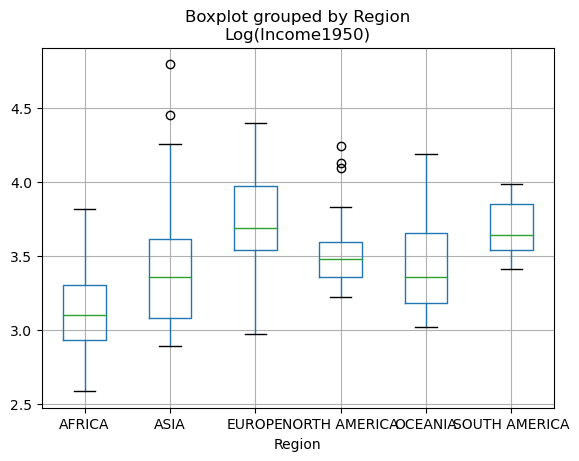

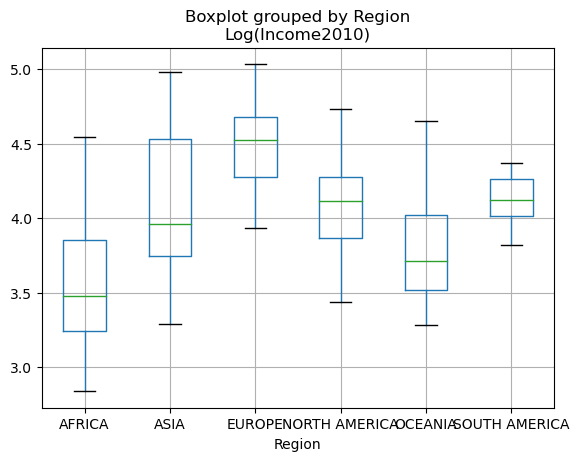

In [14]:
year1950 = yearToData(1950)
year2010 = yearToData(2010) 

year1950["Log(Income1950)"] = np.log10(year1950["Income1950"])
year2010["Log(Income2010)"] = np.log10(year2010["Income2010"])


year1950.boxplot(column="Log(Income1950)", by="Region")
year2010.boxplot(column="Log(Income2010)", by="Region")
plt.show() 






<span style="color:red">MY ANSWER TO: What changed in 60 years?</span> It is clear that all countries increased in income over the last 60 years, though in varied amounts. Also across the 60 year period, Africa, Asia, and North America's deviation from the mean increased signifigantly, while the other regions stayed around the same. 

**e)** Represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html) based on the dataframe created in point c). <span style="color:red">What can you conclude from the plot?</span> (Hint: choose a year where there aren't many missing values!) 

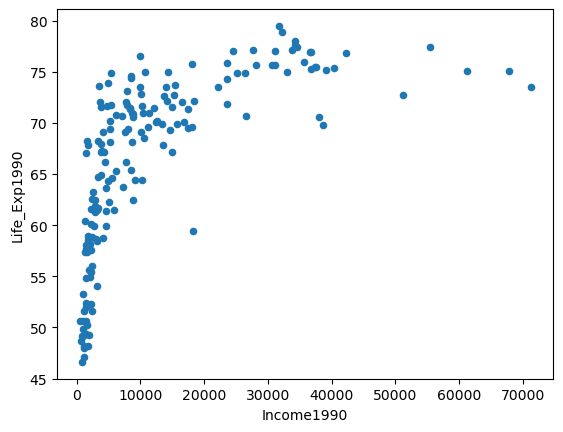

In [21]:
year1990 = yearToData(1990)  
year1990.plot.scatter(x="Income1990", y="Life_Exp1990")
plt.show()

<span style="color:red">MY ANSWER TO: What can you conclude from the plot?</span> I think it is clear that the base life expectancy varies heavily at lower incomes per capita. At medium income levels, the life expectancy increases somewhat, but as income increases, life expectancy hits an upper bounds of around 75/80, where income level doesn't really affect it. It is important to note that while there are a few poorer countries with around medium life expectancies, there are no rich countries with lower life expectancies. 

## Exercise 2 (HW1/2)

The [Round University Ranking (RUR)](https://roundranking.com/ranking/world-university-rankings.html#world-2021) evaluates the performance of 867 world’s leading higher education institutions by 20 indicators grouped into 4 key areas of university activity: Teaching, Research, International Diversity, Financial Sustainability. The top 100 universities are placed in the diamond league, the next 100 in the gold league and so on... (50%)

**a)**  Using the scraping techniques covered in class, scrape the following data fields about the universities (from the website linked above): The name of the University, in which country the University is located, their score and league given by the RUR ranking. Then load the data into a Pandas DataFrame called *df* with the following column names: <font style='font-style : oblique'>University</font>, <font style='font-style : oblique'>Country</font>, <font style='font-style : oblique'>Score</font> and <font style='font-style : oblique'>League</font>. (Hints: look for the 'table' tag, find the rows of the table with the 'tr' tag, and then loop through them extracting the requested elements).

IMPORTANT: You should not re-scrape the data every time you work on the homework, because we don't want the RUR servers to get overloaded. Instead, scrape the data once and then save it to a local file on your computer (Hint: use the *pd.to_csv()* function), then load the data from this file instead of re-scraping the website.

In [22]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [28]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://roundranking.com/ranking/world-university-rankings.html#world-2021") 

source = driver.page_source
soup = BeautifulSoup(source) 

table = soup.find("table")
rows = table.findAll("tr")

u = []
c = []
s = []
l = [] 
for i in range(1, len(rows)): 
    u.append(rows[i].find("td", {"class": "td2"}).text)
    c.append(rows[i].find("td", {"class": "td4"}).text)
    s.append(float(rows[i].find("td", {"class": "td3"}).text))
    l.append(rows[i].find("td", {"class": "td7"}).text) 
    
    df = pd.DataFrame({"University": u, "Country": c, "Score": s, "League": l})
    df.to_csv("uni_rankings.csv", index = False)


**b)** Filter the data as follows:
- Filter out the US universities. (The analysis aims to find out which universities rank high outside the USA to help US students in choosing a study abroad program.)
- Only keep the universities in the Diamond, Gold, Silver and Bronze league.
- Sort the dataframe by score. <span style="color:red">Which are the top 5 ranking universities?</span>

In [30]:
universities = pd.read_csv("uni_rankings.csv")
notUSA = universities[universities.Country != "USA"]

top_ranks = notUSA[(notUSA.League != "Copper League") & (notUSA.League != "World League")]
top_ranks_sorted = top_ranks.sort_values(by = "Score", ascending = False) 
top_ranks_sorted.head() ##The displayed universities below are the top 5 ranking universities. 

,University,Country,Score,League
3,Imperial College London,UK,96.742,Diamond League
4,Karolinska Institute,Sweden,96.609,Diamond League
6,University of Oxford,UK,96.167,Diamond League
7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,94.629,Diamond League
8,University of Cambridge,UK,94.383,Diamond League


**c)** Create a stacked barplot showing what portion of each country's universities are in each league. Country should be on the y axis, number of universities on the x axis, and there should be a legend with the leagues. If you have done everything as written above, then the following code snippet creates the necessary crosstable:

<code>df2 = pd.crosstab(df.Country, df.League, values=df.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)</code><br>

- Only keep the countries, which have at least 10 universities in the DataFrame.
- Sort the countries based on how many universities they have in the DataFrame.
- The labels on the y axis should be the countries, and the x axis should indicate the number of universities in the bronze, silver, gold and diamond leagues for the given country. 

Hint: This plot can be created in a very simple way by using the .plot.barh(stacked=True) method on the crosstable created in the code snippit above.

The barplot should look something like this:

<div>
<img src="https://media.licdn.com/dms/image/C4D22AQFjbmzYD8jo2w/feedshare-shrink_800/0/1676140611085?e=1678924800&v=beta&t=E5Xlq-u78bQVFzi-v5ye8Pyt4SazJi7cIFuAJaNqI1s" width="400"/>
</div>

**d)** In the last exercise you have to create a word cloud from the Mission Statements of the top Universities. We have already scraped these statements for you. You can find the scraped data [here](https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt)! <br>
- Load the text data from this site into a string variable! (Hint: You can load the data with *urlopen* as shown in Notebook1)
- Omit the word "university" from the data!
- Create a word cloud, then <span style="color:red">describe what you see in 2-3 sentences!</span>

(Hint: You can find more information on how to create a Word Cloud at https://www.datacamp.com/community/tutorials/wordcloud-python)

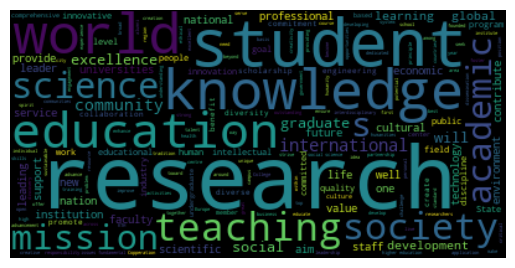

In [34]:
from urllib.request import urlopen 
from wordcloud import WordCloud 
text = urlopen("https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt").read().decode('utf-8')
textToGenerate = text.replace("university", "")
textToGenerate = new_text.replace("University", "")
wordcloud = WordCloud().generate(textToGenerate)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show() 

<span style="color:red">MY ANSWER TO: describe what you see in 2-3 sentences!</span> Clearly student, knowledge, research, education, and world are the most prevelant words in the mission statements of the universities. It seems like they are attempting to appeal to the idea that most students want real world experience, while also focusing on furthering their eductation so that they are prepared for the real world. 